In [54]:
# !pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Prepare the data
test_data = pd.DataFrame()
test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(test_data['pass'])

# Extract features
X = test_data[['test', 'project']]

# Train the perceptron model
model = Perceptron(random_state=0)
model.fit(X, y)

# Make predictions and calculate accuracy
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

accuracy


0.5

In [6]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential

In [9]:


from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(f'Shape of train set (X): {X_train.shape}')
print(f'Shape of train set (y): {y_train.shape}')
print(f'Shape of train set (X): {X_test.shape}')
print(f'Shape of train set (y): {y_test.shape}')

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Shape of train set (X): (404, 13)
Shape of train set (y): (404,)
Shape of train set (X): (102, 13)
Shape of train set (y): (102,)


In [10]:
from tensorflow.keras.layers import Dense


model = Sequential()

input_number = X_train.shape[1] 
model.add(Dense(8, 
                activation='relu', 
                input_shape=(input_number,), 
                name = "Hidden_Layer_1",
               )
         )

model.add(Dense(4, 
                activation='relu',
                name = "Hidden_Layer_2"
               )
         )

model.add(Dense(1, 
                name = "Output"
               )
         )

model.summary()

2024-11-14 11:12:16.855987: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 606.3297  
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 614.6703
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 555.8731
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 571.8091
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 556.3868
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 590.49046
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 476.9113
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 447.7447 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 333.8873
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208.3801


In [14]:
pred = model.predict(X_test[15].reshape(1,13))

print(f'True Value: {y_test[15]}')
print(f'Predicted Value: {pred[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
True Value: 24.3
Predicted Value: 13.926003456115723


In [15]:
# regression with Keras 
input_number = X_train.shape[1] 
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(input_number,), name = "Hidden_Layer_1"))
model.add(Dense(50, activation='relu', name = "Hidden_Layer_2"))
model.add(Dense(1, name = "Output"))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=20, verbose=0)

In [16]:
mae_train = model.evaluate(X_train, y_train, verbose = 0)[1]
mae_test = model.evaluate(X_test, y_test, verbose = 0)[1]
print("\nMAE for train set : {:.3f}".format(mae_train))
print("MAE for test set    : {:.3f}".format(mae_test))


MAE for train set : 6.761
MAE for test set    : 6.876


In [17]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


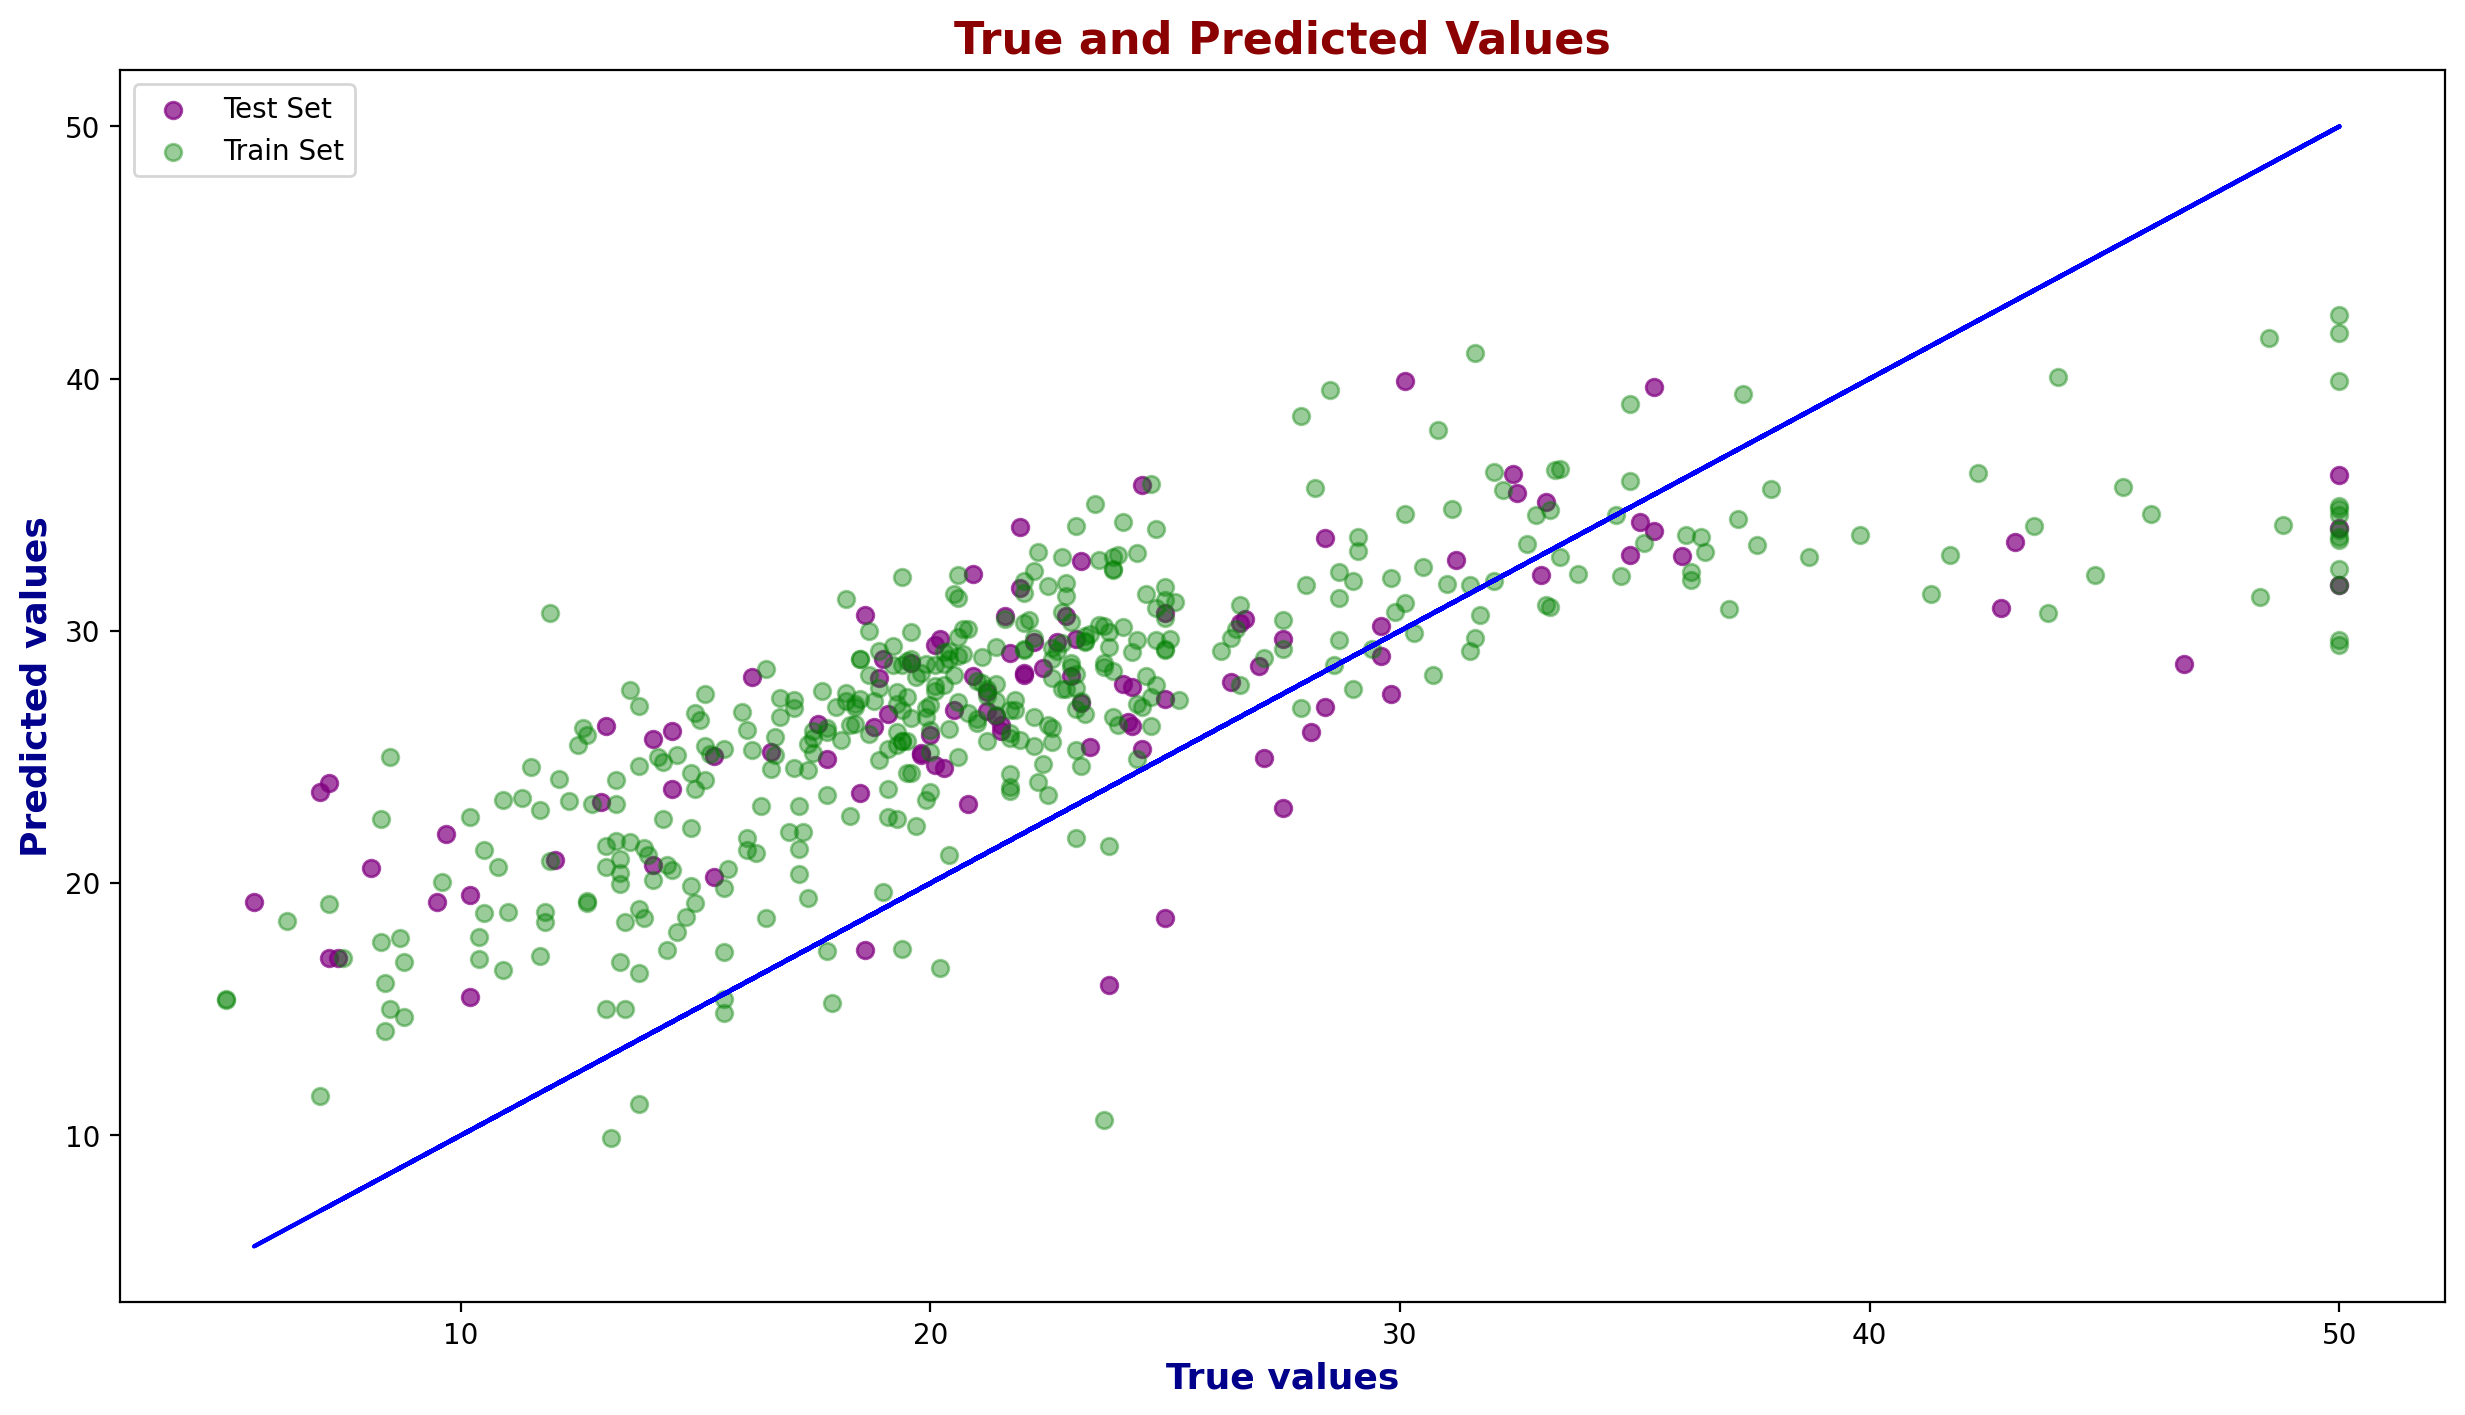

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8), dpi=200)
ax1 = plt.scatter(y_test,pred_test,alpha=0.7,color="purple", )
ax2 = plt.scatter(y_train,pred_train,alpha=0.4,color="green")
ax3 = plt.plot(y_test,y_test,color="blue")
plt.xlabel("True values", color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Predicted values", color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("True and Predicted Values", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Set", 'Train Set'])
plt.show()

In [24]:
# classification with keras 
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('./data/titanic_all_numeric.csv')
X = df.drop('survived', axis=1).values.astype(np.float32)
y = df.survived.values.reshape(-1, 1).astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Shape of train set (X) :", X_train.shape)
print("Shape of train set (y) :", y_train.shape)
print("Shape of test set  (X) :", X_test.shape)
print("Shape of test set  (y) :", y_test.shape)

Shape of train set (X) : (596, 10)
Shape of train set (y) : (596, 1)
Shape of test set  (X) : (295, 10)
Shape of test set  (y) : (295, 1)


In [25]:
# input shape
input_number = X_train.shape[1]
print(input_number)

10


In [26]:
classification_model = Sequential()
classification_model.add(Dense(16,
                               activation='relu',
                               input_shape=(input_number,),
                               name='Hidden_Layer_1',
                              )
                        )
classification_model.add(Dense(4,
                               activation='relu',
                               name='Hidden_Layer_2'
                              )
                        )
classification_model.add(Dense(1,
                               activation='sigmoid',
                               name='Output',
                              )
                        )
classification_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249 (996.00 B)

 Trainable params: 249 (996.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
classification_model.compile(optimizer ='adam',
                             loss='binary_crossentropy', 
                             metrics =['accuracy']
                            )
classification_model.fit(X_train, y_train, epochs=100, verbose=0)

In [29]:
accuracy_train = classification_model.evaluate(X_train, y_train, verbose = 0)[1]
accuracy_test = classification_model.evaluate(X_test, y_test, verbose = 0)[1]
print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("Accuracy for test set  : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.773
Accuracy for test set  : 0.746


In [30]:
y_pred=classification_model.predict(X_test)
y_pred =(y_pred>0.5)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [31]:
from sklearn.metrics import confusion_matrix
hm = confusion_matrix(y_test, y_pred)
print(hm)

[[138  37]
 [ 38  82]]


In [33]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Shape of train set (X) :", X_train.shape)
print("Shape of train set (y) :", y_train.shape)
print("Shape of test set  (X) :", X_test.shape)
print("Shape of test set  (y) :", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape of train set (X) : (60000, 28, 28)
Shape of train set (y) : (60000,)
Shape of test set  (X) : (10000, 28, 28)
Shape of test set  (y) : (10000,)


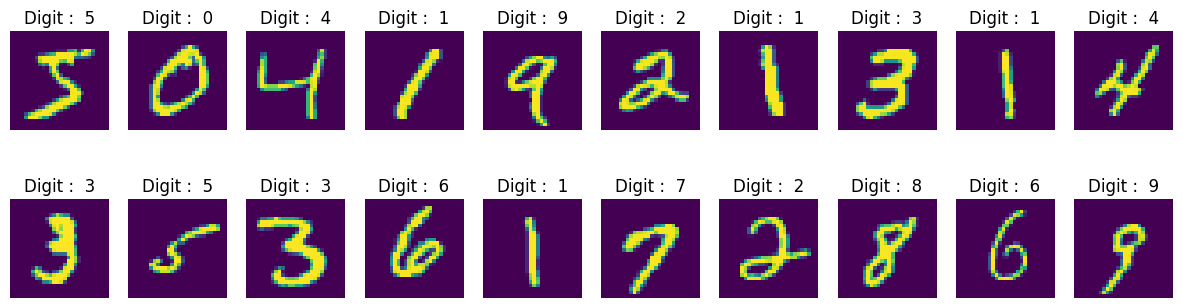

In [34]:
plt.figure(figsize=(15,4))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i])
    plt.title("Digit :  {}".format(y_train[i]))
    plt.axis('off')
plt.show()

In [36]:
train_shape = X_train.shape[0]
test_shape = X_test.shape[0]
X_train_flattened = X_train.reshape(train_shape, 784).astype('float32')
X_test_flattened = X_test.reshape(test_shape, 784).astype('float32')
X_train_flattened /= 255
X_test_flattened /= 255
print("Shape of train set (X) :", X_train_flattened.shape)
print("Shape of test set (X)  :", X_test_flattened.shape)

Shape of train set (X) : (60000, 784)
Shape of test set (X)  : (10000, 784)


In [37]:
input_number = X_train_flattened.shape[1]
mnist_model = Sequential()
mnist_model.add(Dense(32,
                      activation='relu', 
                      input_shape = (input_number,), 
                      name = "Hidden_Layer_1"))
mnist_model.add(Dense(8,
                      activation='relu', 
                      name = "Hidden_Layer_2"))
mnist_model.add(Dense(10,
                      activation='softmax',
                      name = "Output"))
mnist_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,474 (99.51 KB)

 Trainable params: 25,474 (99.51 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
mnist_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)
print("Shape of target : ", y_train_categorical.shape)

Shape of target :  (60000, 10)


In [41]:
for i in range(5):
    print("Digit             :", y_train[i])
    print("Categorical Value :", y_train_categorical[i])
    print("-"*20)

Digit             : 5
Categorical Value : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
--------------------
Digit             : 0
Categorical Value : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--------------------
Digit             : 4
Categorical Value : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
--------------------
Digit             : 1
Categorical Value : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
--------------------
Digit             : 9
Categorical Value : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
--------------------


In [42]:
mnist_model.fit(X_train_flattened, y_train_categorical, epochs=20, verbose=0)

In [44]:
accuracy_train = mnist_model.evaluate(X_train_flattened, y_train_categorical, verbose = 0)[1]
accuracy_test = mnist_model.evaluate(X_test_flattened, y_test_categorical, verbose = 0)[1]
print("\nAccuracy for train set : {:.3f}".format(accuracy_train))
print("\nAccuracy for train set : {:.3f}".format(accuracy_test))


Accuracy for train set : 0.969

Accuracy for train set : 0.959


In [45]:
pred = mnist_model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:
print("Actual value : ", y_test[0], end ="\n--------------\n")

Actual value :  7
--------------


In [47]:
for i, value in enumerate(pred[0]):
    print("'{}' probability : {:.6f}".format(i, value))

'0' probability : 0.000001
'1' probability : 0.000000
'2' probability : 0.000038
'3' probability : 0.000525
'4' probability : 0.000000
'5' probability : 0.000000
'6' probability : 0.000000
'7' probability : 0.999430
'8' probability : 0.000001
'9' probability : 0.000005


In [48]:
predictions = np.argmax(pred, axis=1)
np.not_equal(y_test, predictions).sum()

np.int64(413)

Our model predicted 9587 digit correctly, and 413 digit incorrectly.


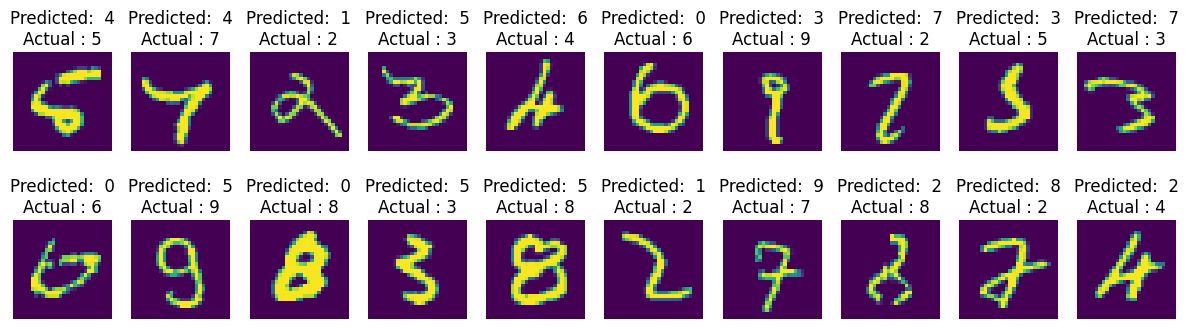

In [53]:
true_pred_number = np.equal(y_test, predictions).sum()
false_pred_number= np.not_equal(y_test, predictions).sum()
print("Our model predicted {} digit correctly, and {} digit incorrectly.".
     format(true_pred_number, false_pred_number))

false_preds = np.where(np.not_equal(y_test, predictions))
plt.figure(figsize=(15,4))
for i, false_index in enumerate(false_preds[0][0:20]):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[false_index])
    plt.title("Predicted:  {}\nActual : {}".
              format(predictions[false_index], y_test[false_index]))
    plt.axis('off')
plt.show()